In [1]:
import numpy as np
import pandas as pd

# Missing Data

NaN is the default missing value marker for reasons of computational speed and convenience.

Pandas will be able to easily detect a NaN value with data of different types:

-   floating point
-   integer
-   boolean
-   general object


In [2]:
np.random.seed(0)

In [3]:
print(1 + np.nan)

nan


In [4]:
print(0 * np.nan)

nan


In [5]:
print(np.nan != np.nan)

True


In [6]:
print(np.nan == np.nan)

False


In [7]:
data = np.array([1, None, 3, 4])

print(data)

[1 None 3 4]


In [8]:
data = np.array([1, np.nan, 3, 4])

print(data)

[ 1. nan  3.  4.]


In [9]:
print(np.sum(data))

nan


In [10]:
print(np.nansum(data))

8.0


In [11]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

## Pandas NaN Examples


In [12]:
def highlight_nan(
    data: pd.DataFrame,
    color: str,
) -> pd.DataFrame:
    attr = f"background-color: {color}"

    is_nan = pd.isna(data)

    return pd.DataFrame(
        np.where(is_nan, attr, ""), index=data.index, columns=data.columns
    )

In [13]:
def df_info(
    df: pd.DataFrame,
) -> None:
    return df.style.apply(highlight_nan, color="darkorange", axis=None)

In [14]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    index=["a", "c", "e", "f", "h"],
    columns=["one", "two", "three"],
)

In [15]:
df_info(df)

,one,two,three
a,1.764052,0.400157,0.978738
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
f,0.410599,0.144044,1.454274
h,0.761038,0.121675,0.443863


In [16]:
df["one"]["a"] = None
df["two"]["f"] = None

In [17]:
df_info(df)

,one,two,three
a,nan,0.400157,0.978738
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
f,0.410599,nan,1.454274
h,0.761038,0.121675,0.443863


In [18]:
df_info(pd.isna(df))

,one,two,three
a,True,False,False
c,False,False,False
e,False,False,False
f,False,True,False
h,False,False,False


In [19]:
df_check = pd.isna(df)

df_check.any(axis=1)

a     True
c    False
e    False
f     True
h    False
dtype: bool

#### Remove NaN Values


In [20]:
df_info(df.dropna())

,one,two,three
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
h,0.761038,0.121675,0.443863


In [21]:
df_info(df.dropna(axis="columns"))

,three
a,0.978738
c,-0.977278
e,-0.103219
f,1.454274
h,0.443863


In [22]:
df_info(df.dropna(axis="rows"))

,one,two,three
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
h,0.761038,0.121675,0.443863


Operations with NaN Values

-   When summing data, NA (missing) values will be treated as zero.
-   If the data are all NA, the result will be 0.
-   Cumulative methods like cumsum() and cumprod() ignore NA values by default.
    -   To override this behaviour and include NA values, use skipna=False.


In [23]:
df_info(df)

,one,two,three
a,nan,0.400157,0.978738
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
f,0.410599,nan,1.454274
h,0.761038,0.121675,0.443863


In [24]:
print(df["two"].sum())

2.238033006712321


In [25]:
print(df.sum())

one      4.362618
two      2.238033
three    1.796378
dtype: float64


#### Fill NaN values


In [26]:
df_info(df.fillna(value=0.0))

,one,two,three
a,0.000000,0.400157,0.978738
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
f,0.410599,0.000000,1.454274
h,0.761038,0.121675,0.443863


In [27]:
df_info(df.fillna("missing"))

,one,two,three
a,missing,0.400157,0.978738
c,2.240893,1.867558,-0.977278
e,0.950088,-0.151357,-0.103219
f,0.410599,missing,1.454274
h,0.761038,0.121675,0.443863


#### Interpolate


In [28]:
num_samples = 10

index = pd.date_range("21/4/2021", periods=num_samples)

values = 2 * np.sort(np.random.randn(num_samples)) + 1
df = pd.DataFrame(values, index)
df.iloc[2] = None
df.iloc[6] = None

df_info(df)

,0
2021-04-21 00:00:00,-4.105980
2021-04-22 00:00:00,-0.708191
2021-04-23 00:00:00,nan
2021-04-24 00:00:00,0.589683
2021-04-25 00:00:00,1.626135
2021-04-26 00:00:00,1.667349
2021-04-27 00:00:00,nan
2021-04-28 00:00:00,2.728872
2021-04-29 00:00:00,3.988158
2021-04-30 00:00:00,5.539509


<Axes: >

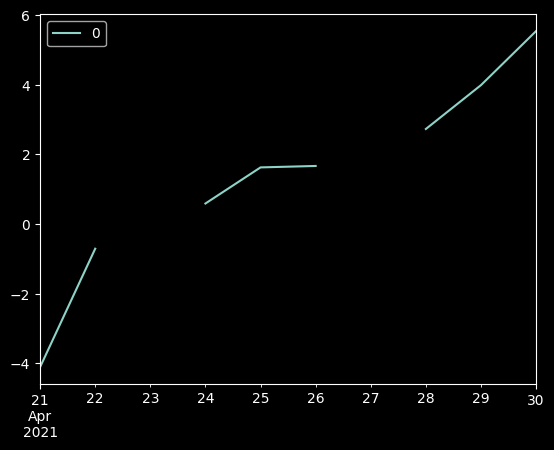

In [29]:
df.plot()

In [30]:
df_info(df.interpolate())

,0
2021-04-21 00:00:00,-4.105980
2021-04-22 00:00:00,-0.708191
2021-04-23 00:00:00,-0.059254
2021-04-24 00:00:00,0.589683
2021-04-25 00:00:00,1.626135
2021-04-26 00:00:00,1.667349
2021-04-27 00:00:00,2.198111
2021-04-28 00:00:00,2.728872
2021-04-29 00:00:00,3.988158
2021-04-30 00:00:00,5.539509


<Axes: >

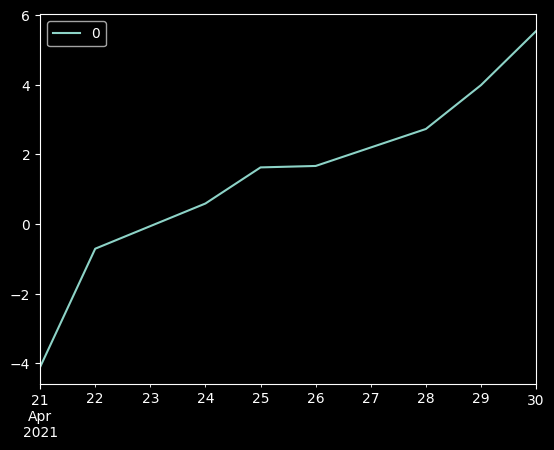

In [31]:
df.interpolate().plot()